# THE SPARKS FOUNDATIONN - GRIP NOV'22

### DATA SCIENCE AND BUSINESS ANALYTICS INTERN NOV'22

DONE BY: MUHAMMAD HABIB

PROBLEM STATEMENT: PREDICT THE PERCENTAGE OF THE STUDENT ON THE BASIS OF STUDY HOURS.WHAT WILL BE THE PREDICTED SCORE IF STUDENT STUDY 9.25HRS/DAY (USING SUPERVIED ML)

DATA SET USED: https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv



In [225]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [226]:
url = 'https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv'
df = pd.read_csv(url)

In [227]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [228]:
df.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [229]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [230]:
df.shape

(25, 2)

Text(0.5, 1.0, 'Hours vs Percentage Scores')

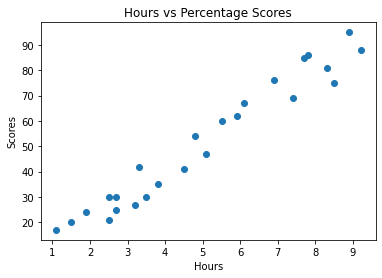

In [231]:
plt.scatter(df['Hours'] , df['Scores'])
plt.xlabel('Hours')
plt.ylabel("Scores")
plt.title("Hours vs Percentage Scores")

From the above graph we can see a positive linear relationship between the dependent and independent variable i.e: Hours and Scores. As learning hours increases score also increase


In [232]:
X = df.iloc[0:25 , 0].values.reshape(-1,1)
Y = df.iloc[:,-1]

Import Model to split the data


In [233]:
from sklearn.model_selection import train_test_split

Splitting of data

In [234]:
X_train,X_test,y_train,y_test = train_test_split(X,Y, test_size= 0.2, random_state= 42)
print("Splitted Successfully")

Splitted Successfully


In [235]:
print("No of test samples are:" ,X_test.shape[0])
print("No of training samples are:" ,X_train.shape[0])


No of test samples are: 5
No of training samples are: 20


Importing Model

In [236]:
from sklearn.linear_model import LinearRegression

In [237]:
lr = LinearRegression().fit(X_train,y_train)

In [238]:
print("Intercept:" , lr.intercept_)
print("Slope:",lr.coef_)

Intercept: 2.826892353899737
Slope: [9.68207815]


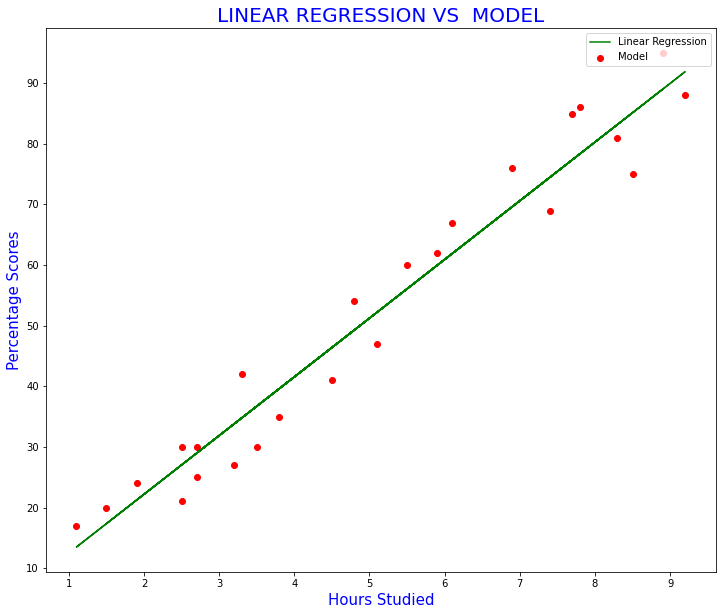

In [239]:
reg_line=lr.coef_*X+lr.intercept_
plt.figure(figsize=(12,10))
plt.title("LINEAR REGRESSION VS  MODEL",fontsize=20,color="Blue")
plt.scatter(X,Y,label="Model",color='red')
plt.plot(X,reg_line,label="Linear Regression",color="green")
plt.xlabel("Hours Studied",color="Blue",fontsize=15)
plt.ylabel("Percentage Scores",color="Blue",fontsize=15)
plt.legend(loc=1)
plt.show()

In [240]:
y_pred = lr.predict(X_test)


In [241]:
data = pd.DataFrame({"Actual Scores" :y_test , "Predicted Score": y_pred})
data

,Actual Scores,Predicted Score
8,81,83.188141
16,30,27.032088
0,21,27.032088
23,76,69.633232
11,62,59.951153


In [242]:
lr.score(X_test,y_test)

0.9678055545167994

In [243]:
lr.score(X_train,y_train)

0.9491209376364416

In [244]:
hours = ([9.25,9.5,9.75])
hours = pd.DataFrame(hours)
pred = lr.predict(hours)
pred = pd.DataFrame(pred)
Data = pd.concat([hours,pred], axis=1,keys= ['Hours' , 'Predicted Score'])
Data

,Hours,Predicted Score
,0,0
0,9.25,92.386115
1,9.50,94.806635
2,9.75,97.227154


The Predicted Score of a student if he studies 9.25hr/day is 92.38%
